In [2]:
import pandas as pd

# Read the data.csv file
mydf = pd.read_csv('/content/data.csv')


- [View data](https://www.kaggle.com/sulianova/feature-explanation-and-eda)

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# magic comand
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Introduction


    The "Diagnostic Wisconsin Breast Cancer Database" is a publicly available data set from the UCI machine learning repository. The dataset gives information about tumor features, that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For each observation there are 10 features, which describe tumor size, density, texture, symmetry, and other characteristics of the cell nuclei present in the image. The mean, standard error and "worst" mean (mean of the three largest values) of these features were computed for each image, resulting in 30 features. The categorical target feature indicates the type of the tumor.
# <center>
<img align="center" src="http://www.jcytol.org/articles/2016/33/4/images/JCytol_2016_33_4_182_190449_f1.jpg">
<br>

**Fine needle aspiration (FNA)**, also called fine needle biopsy, is a type of biopsy where a needle is inserted into a lump or mass to collect a sample of cells. These cells are then looked at under a microscope to help your doctor determine if the mass or lump is cancerous (malignant) or noncancerous (benign).

### 1- Load the dataset and set the Index to 'id'

In [ ]:
# mydf = pd.read_csv('data.csv')

In [4]:
mydf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:

data = mydf.set_index('id')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


### 2- Please drop the 'Unnamed: 32' column

In [6]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


### Look for any Issues and solve them

In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
# remove perimeter_mean, area_mean as it can be calculated from radius_mean
# remove area_worst, perimter_worst as it can be caluclated from radius_worst
data.drop(['perimeter_mean', 'area_mean', 'area_worst', 'perimeter_worst'], axis=1, inplace=True)

In [11]:
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


### 3- Please to use 1,0 instead of 'M' and 'B' in the diagnosis column

In [12]:
for Col in ['diagnosis']:
    Unique_entries = data[Col].unique()
    D = {}
    for i in range(len(Unique_entries)):
        D[Unique_entries[i]]=i
    data[Col] = data[Col].map(D)


In [13]:
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


### 4- Please split the data into training data and test data

In [14]:
X = data.drop(["diagnosis"], 1) #features
Y = data["diagnosis"] #output class


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(398, 26)
(171, 26)


### 5- Apply Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
## Criterion = 'entropy'
DT1 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 2)
DT1.fit(X_train,Y_train)
Y_pred_entropy = DT1.predict(X_test)

In [18]:
## Criterion = 'gini'
DT2 = DecisionTreeClassifier(criterion = 'gini' , max_depth = None )
DT2.fit(X_train,Y_train)
Y_pred_gini = DT2.predict(X_test)

### 6- Show Precision, Recall and Accuracy on the Test Dataset

In [19]:
#Entropy
from sklearn.metrics import accuracy_score,precision_score,f1_score
print("Accuracy: ", accuracy_score(Y_test,Y_pred_entropy))
print("Precision: ", precision_score(Y_test,Y_pred_entropy))
print("Recall: ", f1_score(Y_test,Y_pred_entropy))


Accuracy:  0.9122807017543859
Precision:  0.9705882352941176
Recall:  0.9295774647887325


In [20]:
#Gini
print("Accuracy: ", accuracy_score(Y_test,Y_pred_gini))
print("Precision: ", precision_score(Y_test,Y_pred_gini))
print("Recall: ", f1_score(Y_test,Y_pred_gini))

Accuracy:  0.9298245614035088
Precision:  0.9541284403669725
Recall:  0.9454545454545454


[Text(0.5, 0.8333333333333334, 'x[18] <= 16.79\nentropy = 0.959\nsamples = 398\nvalue = [152, 246]'),
 Text(0.25, 0.5, 'x[23] <= 0.137\nentropy = 0.378\nsamples = 259\nvalue = [19, 240]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.125\nsamples = 233\nvalue = [4, 229]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.983\nsamples = 26\nvalue = [15, 11]'),
 Text(0.75, 0.5, 'x[22] <= 0.232\nentropy = 0.257\nsamples = 139\nvalue = [133, 6]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 123\nvalue = [123, 0]')]

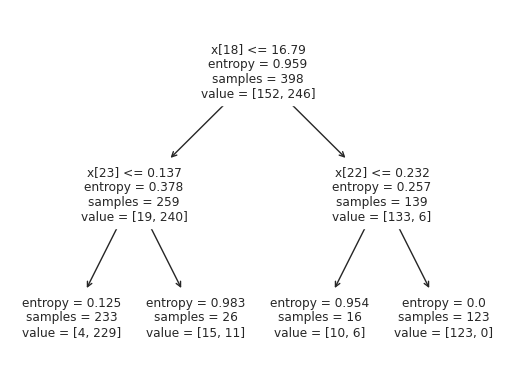

In [21]:
from sklearn import tree
tree.plot_tree(DT1) #entropy and max_depth = 4

[Text(0.6689814814814815, 0.9375, 'x[18] <= 16.79\ngini = 0.472\nsamples = 398\nvalue = [152, 246]'),
 Text(0.4861111111111111, 0.8125, 'x[23] <= 0.142\ngini = 0.136\nsamples = 259\nvalue = [19, 240]'),
 Text(0.3425925925925926, 0.6875, 'x[8] <= 0.643\ngini = 0.041\nsamples = 237\nvalue = [5, 232]'),
 Text(0.24074074074074073, 0.5625, 'x[23] <= 0.137\ngini = 0.025\nsamples = 234\nvalue = [3, 231]'),
 Text(0.14814814814814814, 0.4375, 'x[12] <= 0.003\ngini = 0.017\nsamples = 230\nvalue = [2, 228]'),
 Text(0.07407407407407407, 0.3125, 'x[19] <= 26.635\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.037037037037037035, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.3125, 'x[19] <= 33.35\ngini = 0.009\nsamples = 226\nvalue = [1, 225]'),
 Text(0.18518518518518517, 0.1875, 'gini = 0.0\nsamples = 213\nvalue = [0, 213]'),
 Text(0.25925925925925924, 0.1875, 'x[19] <= 33.56\ngini 

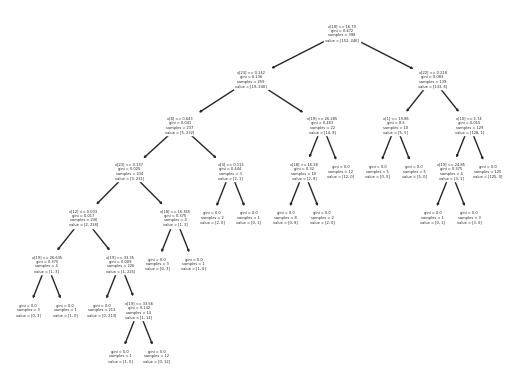

In [22]:
from sklearn import tree
tree.plot_tree(DT2) #entropy and max_depth = None

In [23]:
# max_list = [1,2,3,4]
for i in range(1-4):
    DT = DecisionTreeClassifier(max_depth = i )
    DT.fit(X_train,Y_train)
    Y_pred = DT.predict(X_test)
    tree.plot_tree(DT)


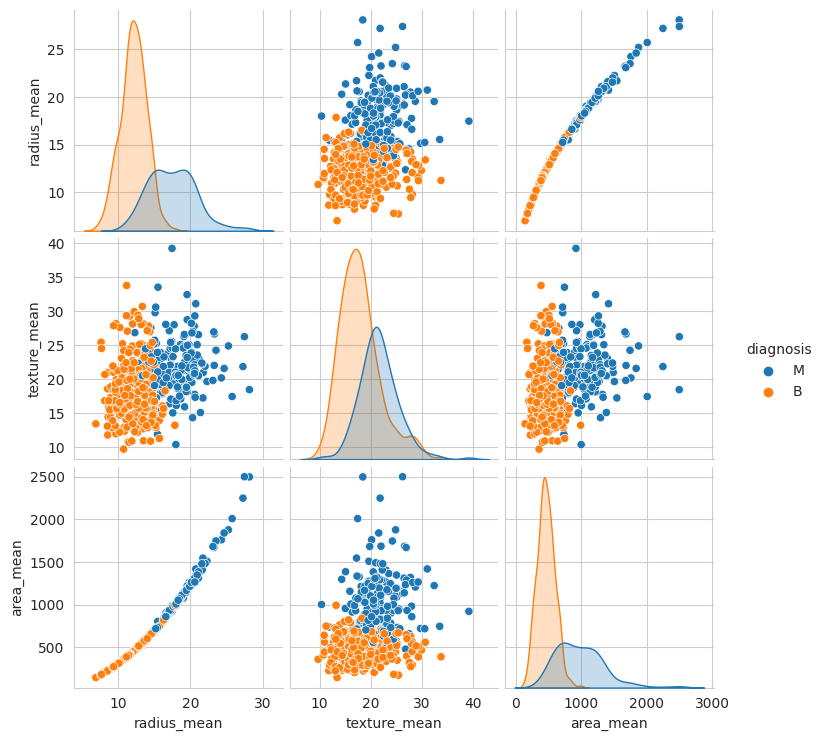

In [27]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Pairplot
sns.pairplot(mydf, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean'])
plt.show()



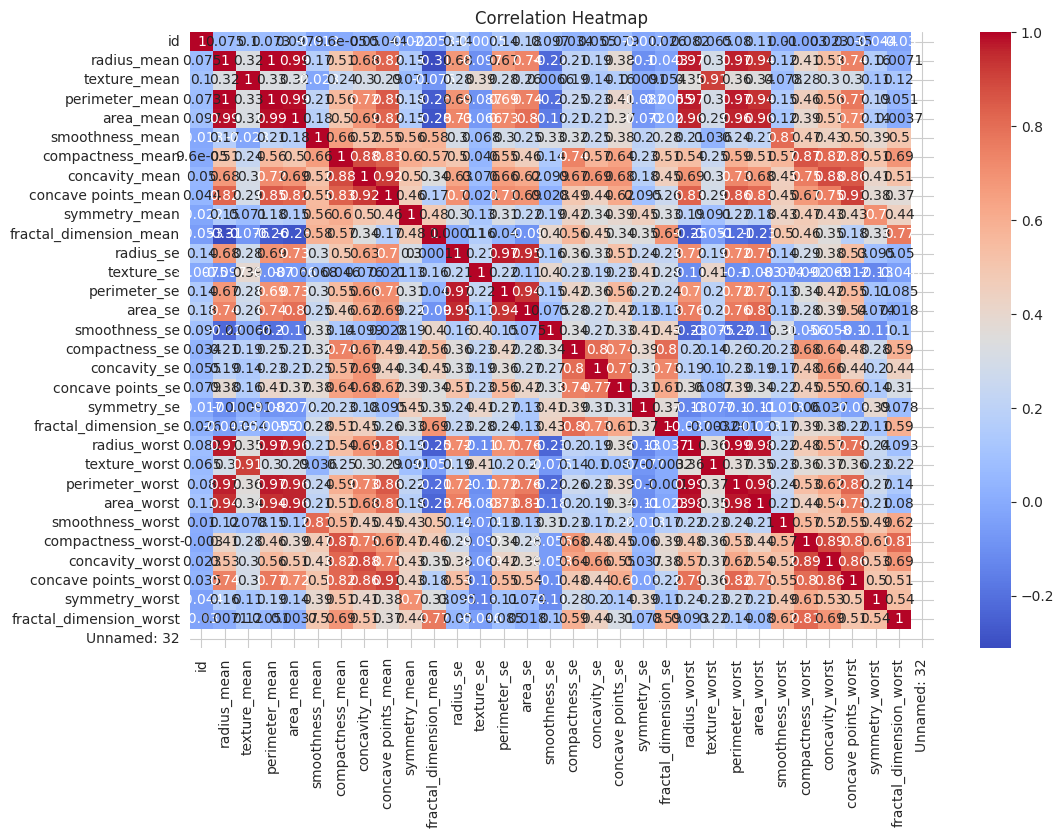

In [28]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mydf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

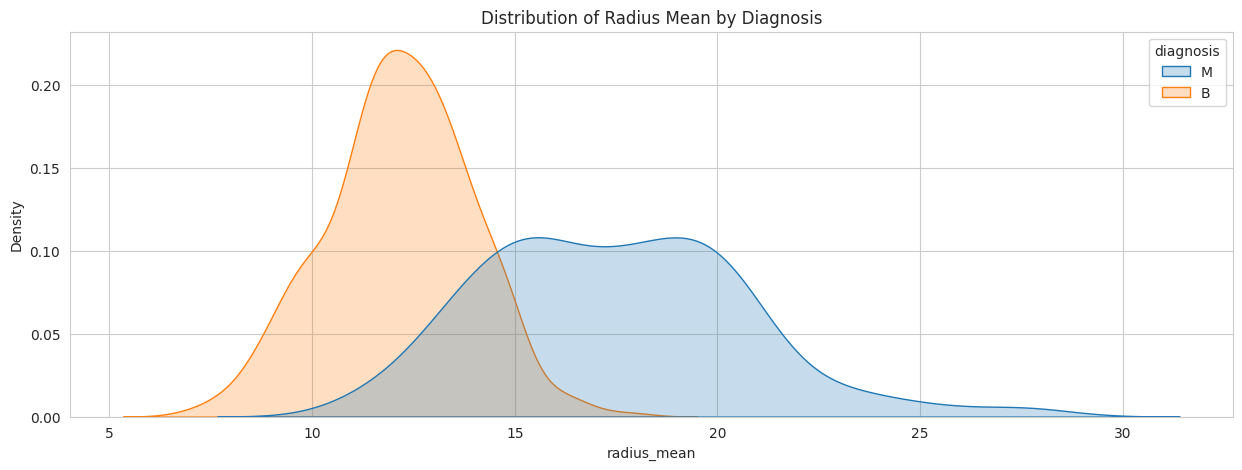

In [29]:
# 3. Distribution of Tumor Features
plt.figure(figsize=(15, 5))
sns.kdeplot(data=mydf, x='radius_mean', hue='diagnosis', fill=True, common_norm=False)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()

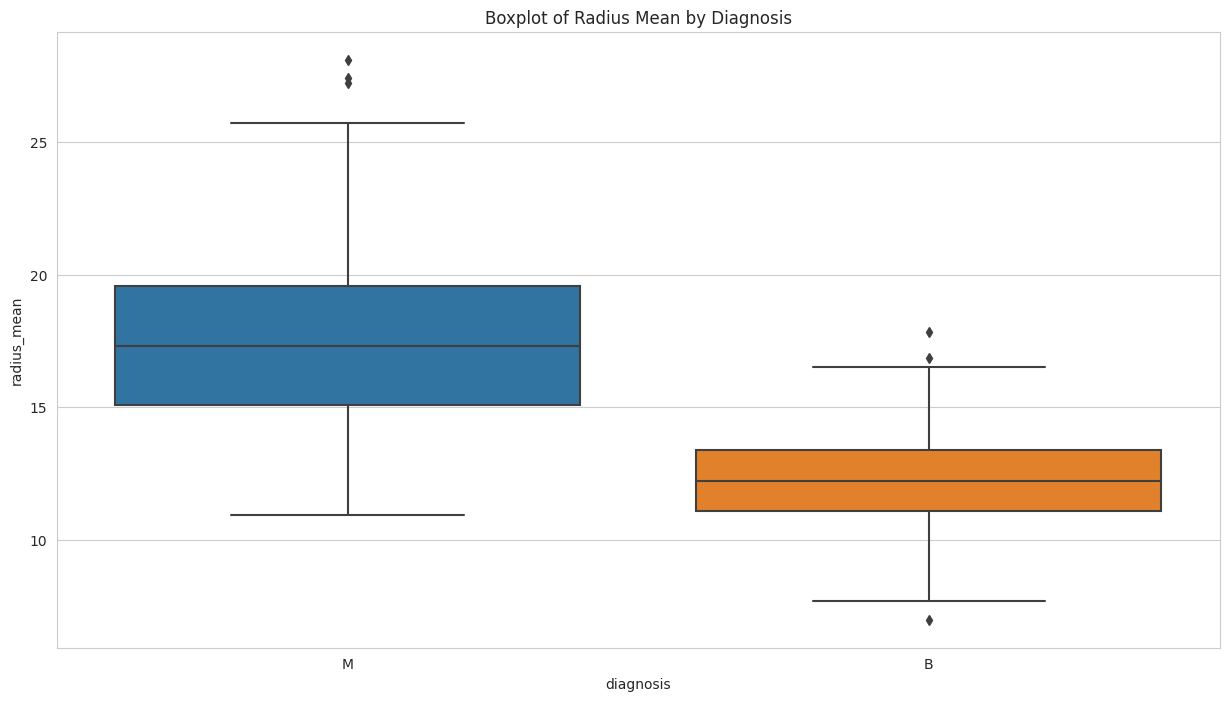

In [31]:
# 4. Boxplots for Diagnosis
plt.figure(figsize=(15, 8))
sns.boxplot(x='diagnosis', y='radius_mean', data=mydf)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()


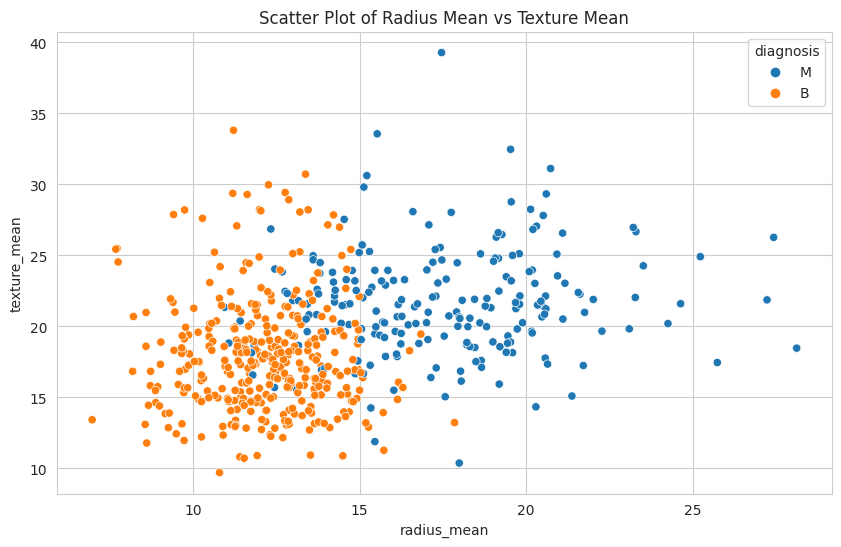

In [33]:
# 5. Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mydf, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Scatter Plot of Radius Mean vs Texture Mean')
plt.show()

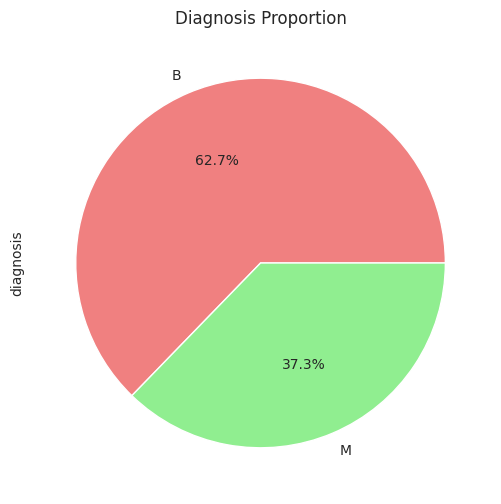

In [34]:
# 6. Pie Chart for Diagnosis Proportion
plt.figure(figsize=(6, 6))
mydf['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Diagnosis Proportion')
plt.show()

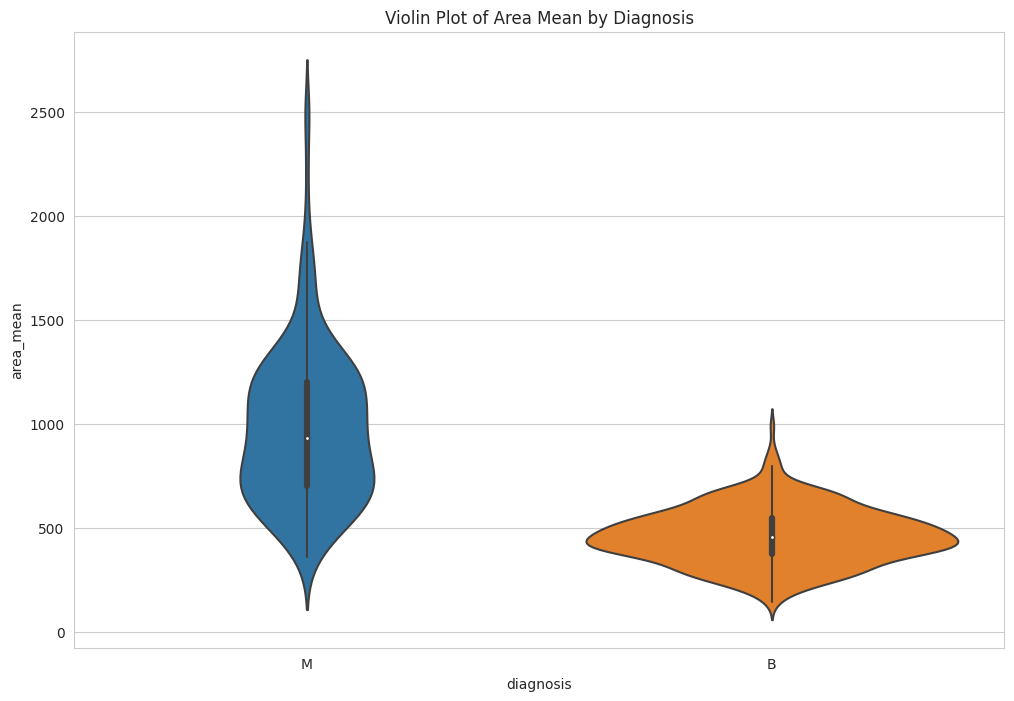

In [35]:
# 7. Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(x='diagnosis', y='area_mean', data=mydf)
plt.title('Violin Plot of Area Mean by Diagnosis')
plt.show()



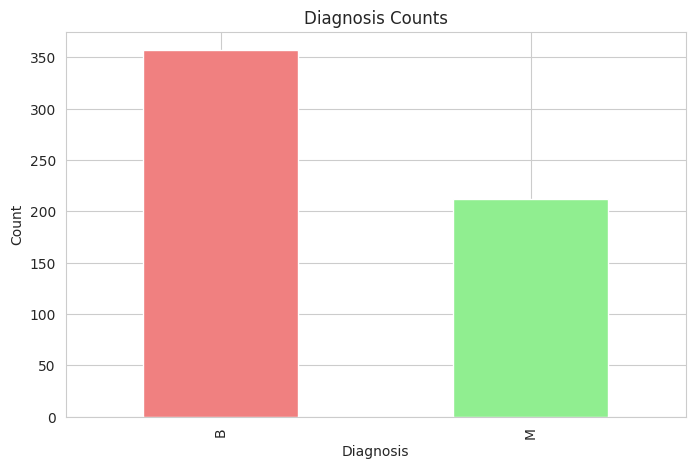

In [36]:
# 8. Bar Chart for Diagnosis Counts
plt.figure(figsize=(8, 5))
mydf['diagnosis'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



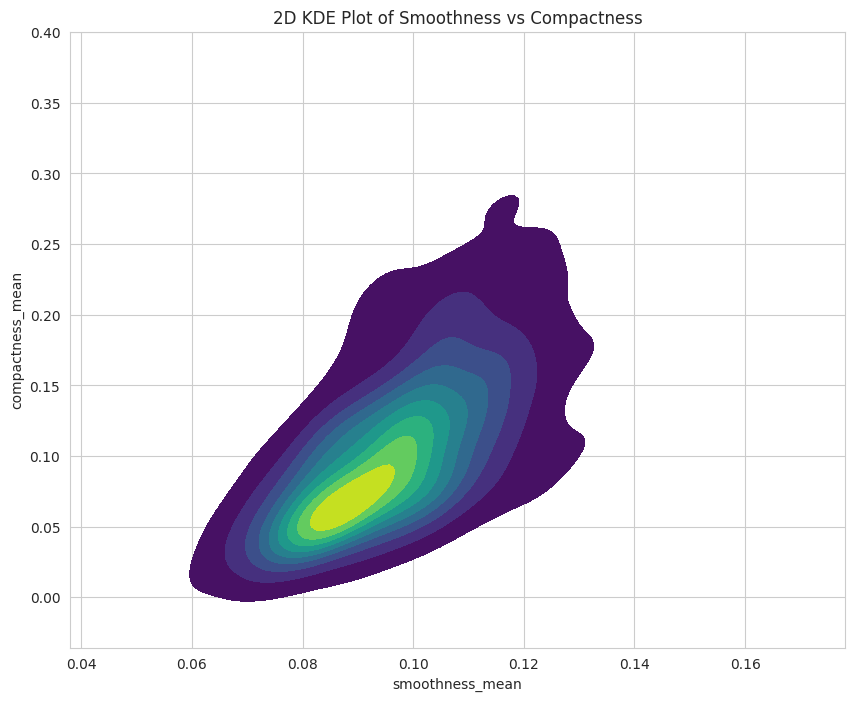

In [37]:
# 9. Distribution of Smoothness and Compactness (2D KDE)
plt.figure(figsize=(10, 8))
sns.kdeplot(data=mydf, x='smoothness_mean', y='compactness_mean', fill=True, cmap='viridis')
plt.title('2D KDE Plot of Smoothness vs Compactness')
plt.show()